# Library importation and request status getting
First we are importing all the needed libraries and then we are asking to the website weahterandclimate.com if it allows us scraping datas


In [38]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
url = "https://weatherandclimate.com"
request = requests.get(url)
print(request.status_code)

200


# Creating a function to clean the scrapped data
Now we are creating a function in order to remove all the unecessary  characters in the collected data, especially elements like "°C" or blank space.

In [25]:
def place(array,index,separator):
    storage = []
    for i in range(len(array)):
            storage.append((array[i].split(separator))[index])

    return storage

The request status code is 200, so the website allows our request so we can scrap data in it.

# Creating a scraping function to collect the summary data
Our goal is now to create a function to scrap a table of the summary data in a specific year and specific mounth for a selected province in Madagascar.
Then after scraping it stores the collected data into an excel file so you can analyze it .

In [26]:
def summary_scrap(town,month,year):
    request = requests.get(url + "/{}/{}-{}".format(town,month,year))
    soup = BeautifulSoup(request.text,"lxml")
    table = soup.find("table",{"class","tb8"}).find_all("td") 
    data = []
    for i in range(len(table)):
        if table[i].text != "":
            data.append(table[i].text)
    
    tx = place(data[1:4],0,"°C")
    t= place(data[5:8],0,"°C")
    tm = place(data[9:12],0,"°C")
    td = place(data[13:16],0,"°C")
    RR = place(data[17:20],0,"|")
    ff = place(data[27:30],0,"|")
    rf = place(data[31:34],0,"kmh")
    mslp = place(data[35:],0,"mb")
 

    df = pd.DataFrame({"max_temperature [°C]":tx,"avg_temperature [°C]":t,"min_temperature [°C]":tm,"dew_point [°C]":td,"RR [mm]":RR,"FF [kmh]":ff,"gust_wind[kmh]":rf,"mslp[mb]":mslp})
    df["RR [mm]"] = df["RR [mm]"].str.replace("mm"," ")
    df["FF [kmh]"] = df["FF [kmh]"].str.replace("kmh"," ")
    
    for i in range(len(df.columns)):
        df[(df.columns)[i]] = df[(df.columns)[i]].astype("float64")
    
    try:
        df.to_excel("summary:{}_{}_{}.xlsx".format(town,month,year),sheet_name="sheet1",index = False)

    except:
        pass
    
    return df

#example of scrapping summary data for Toamasina in January 2020
summary_scrap("toamasina","january","2020")

,max_temperature [°C],avg_temperature [°C],min_temperature [°C],dew_point [°C],RR [mm],FF [kmh],gust_wind[kmh],mslp[mb]
0,31.0,28.00,26.00,24.00,111.20,20.00,30.00,111.20
1,28.0,26.58,24.29,22.13,16.94,12.06,17.65,16.94
2,24.0,24.00,23.00,20.00,0.00,6.00,10.00,0.00


# Creating a scraping function to collect a daily data in a specific month at a specific year for a specific province
Now after realizing a function that collects a summary data,we are going to scrap a daily data . After collected and cleaned the data can be analyzed.

In [27]:
def daily_scrap(town,month,year):

    request = requests.get(url + "/{}/{}-{}".format(town,month,year))
    soup = BeautifulSoup(request.text,"lxml")
    table = soup.find("table",{"class","tb7"}).find_all("tr") 
    data = []

    for i in range(2,len(table)):
        if table[i].text != "":
            data.append(table[i].text.split("|"))

    data = np.array(data)  
    date = place(data[:,0],1,"\n")
    temperature = place(data[:,0],2,"\n")
    td = place(data[:,1],1,"\n")
    U = place(data[:,2],1,"\n")
    ff = place(data[:,2],2,"\n")
    P = place(data[:,4],0,"\n")
    RR = place(data[:,5],0,"\n")
    df = pd.DataFrame({"date":date,"temperature[°C]":temperature,"td[°C]":td,"Humidity[%]":U,"wind_speed[m/s]":ff,"Pressure[hPa]":P,"RR[mm]":RR})

    for i in range(1,len(df.columns)):
        df[(df.columns)[i]] = df[(df.columns)[i]].astype("float64")

    df["date"] = df["date"].astype("datetime64[ns]")

    try:
        df.to_excel("daily:{}_{}_{}.xlsx".format(town,month,year),sheet_name="sheet1",index = False)
        
    except:
        pass
    
    return df

#example of scraping daily data for Antananarivo in December 2015
daily_scrap("antananarivo","december","2015")

,date,temperature[°C],td[°C],Humidity[%],wind_speed[m/s],Pressure[hPa],RR[mm]
0,2015-12-01,22.0,16.0,76.0,9.0,1016.0,0.44
1,2015-12-02,22.0,15.0,76.0,13.0,1017.0,0.14
2,2015-12-03,24.0,14.0,64.0,11.0,1016.0,0.01
3,2015-12-04,24.0,14.0,55.0,13.0,1015.0,0.00
4,2015-12-05,22.0,16.0,77.0,7.0,1015.0,0.41
5,2015-12-06,23.0,15.0,70.0,9.0,1014.0,0.10
6,2015-12-07,24.0,14.0,61.0,8.0,1013.0,0.00
7,2015-12-08,23.0,16.0,73.0,10.0,1013.0,0.20
8,2015-12-09,23.0,17.0,77.0,10.0,1015.0,0.51
9,2015-12-10,23.0,17.0,77.0,8.0,1015.0,0.87


# Example of an Exploratory Data Analysis for Antananarivo for December and July 2010
Now let's make a little EDA test.We will gather data for Antananarivo for 2 specific months first and then making a comparison. The parameter we will be selecting is the temperature here.

December mean temperautre :21.258064516129032°C
July mean temperature : 13.612903225806452°C


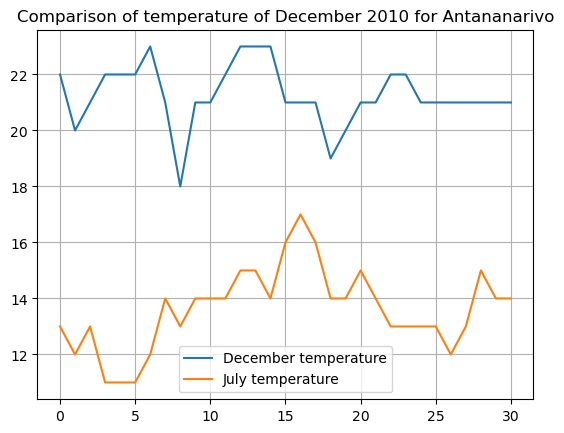

In [36]:
december = daily_scrap("antananarivo","december","2010")
july = daily_scrap("antananarivo","july","2010")
t1 = december["temperature[°C]"].astype("int64")
t2 = july["temperature[°C]"].astype("int64")
plt.grid()
plt.plot(np.arange(len(t1)),t1,label = "December temperature")
plt.plot(np.arange(len(t2)),t2,label = "July temperature")
plt.legend(loc = "lower center")
plt.title("Comparison of temperature of December 2010 for Antananarivo")
print(f"December mean temperautre :{np.mean(t1)}°C")
print(f"July mean temperature : {np.mean(t2)}°C")

As you can see the temperature of December is higher than on July, it relates exactly the difference between  Summer and Winter for Madagascar.

# Example of a multiple files scraping and analysis
Now we are going to scrap multiple files. For example  we can collect all the mean rainfall data for all the 6 provinces of Madagascar in February 2015.

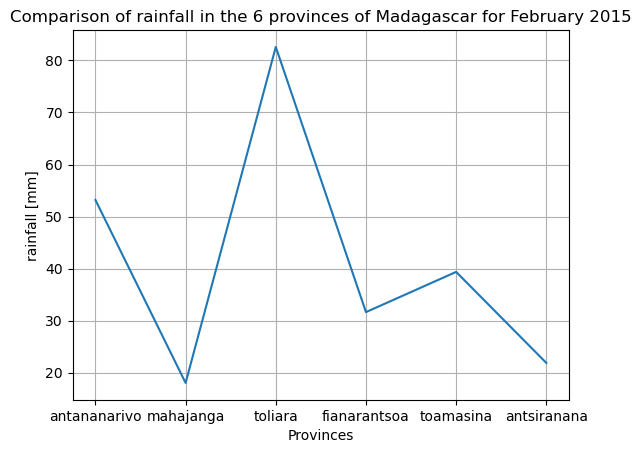

In [37]:
stored = np.zeros((6,))
provinces = ["antananarivo","mahajanga","toliara","fianarantsoa","toamasina","antsiranana"]
for i in range(len(provinces)):
    stored[i] = (summary_scrap(provinces[i],"february","2015")["RR [mm]"][0] + summary_scrap(provinces[i],"february","2015")["RR [mm]"][1])/2

plt.plot(provinces,stored)
plt.title("Comparison of rainfall in the 6 provinces of Madagascar for February 2015")
plt.xlabel("Provinces")
plt.ylabel("rainfall [mm]")
plt.grid()


As we can see the maximum data is located at the town of Toliara, at this time a flood was recorded.